In [43]:
import findspark
findspark.init()

In [44]:
SET SPARK_LOCAL_HOSTNAME=localhost 

SyntaxError: invalid syntax (2779126699.py, line 1)

In [45]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("myFirstApp").config("spark.driver.host","localhost").getOrCreate()

In [46]:
spark.sparkContext

<SparkContext master=local[*] appName=myFirstApp>

# DATA INGESTION


In [47]:
book = spark.read.text('pride.txt')

AnalysisException: Path does not exist: file:/C:/Users/indee/Tut_Pyspark/pride.txt

In [6]:
book.printSchema()

root
 |-- value: string (nullable = true)



In [7]:
book.show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This eBook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|www.gutenberg.org...|
|will have to chec...|
|   using this eBook.|
|                    |
|Title: Pride and ...|
|                    |
| Author: Jane Austen|
|                    |
|Release Date: Nov...|
|[Most recently up...|
|                    |
|   Language: English|
|                    |
|Produced by: Chuc...|
+--------------------+
only showing top 20 rows



In [8]:
book.show(10,truncate=50)

+--------------------------------------------------+
|                                             value|
+--------------------------------------------------+
|The Project Gutenberg eBook of Pride and prejud...|
|                                                  |
|This eBook is for the use of anyone anywhere in...|
|most other parts of the world at no cost and wi...|
|whatsoever. You may copy it, give it away or re...|
|of the Project Gutenberg License included with ...|
|www.gutenberg.org. If you are not located in th...|
|will have to check the laws of the country wher...|
|                                 using this eBook.|
|                                                  |
+--------------------------------------------------+
only showing top 10 rows



In [9]:
spark.read

In [10]:
dir(spark.read)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_df',
 '_jreader',
 '_set_opts',
 '_spark',
 'csv',
 'format',
 'jdbc',
 'json',
 'load',
 'option',
 'options',
 'orc',
 'parquet',
 'schema',
 'table',
 'text']

In [11]:
book

DataFrame[value: string]

In [12]:
print(spark.read.__doc__)


    Interface used to load a :class:`DataFrame` from external storage systems
    (e.g. file systems, key-value stores, etc). Use :attr:`SparkSession.read`
    to access this.

    .. versionadded:: 1.4
    


In [13]:
book.printSchema()

root
 |-- value: string (nullable = true)



In [14]:
book

DataFrame[value: string]

In [15]:
import pandas as pd

In [16]:
df = pd.read_fwf('pride.txt',header=0, sep=",")

In [17]:
df

,"The Project Gutenberg eBook of Pride and prejudice, by Jane Austen"
0,This eBook is for the use of anyone anywhere i...
1,most other parts of the world at no cost and w...
2,"whatsoever. You may copy it, give it away or r..."
3,of the Project Gutenberg License included with...
4,www.gutenberg.org. If you are not located in t...
...,...
11880,facility: www.gutenberg.org
11881,This website includes information about Projec...
11882,including how to make donations to the Project...
11883,"Archive Foundation, how to help produce our ne..."


In [18]:
book.show(10,truncate=20)

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This eBook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|www.gutenberg.org...|
|will have to chec...|
|   using this eBook.|
|                    |
+--------------------+
only showing top 10 rows



In [19]:
book.printSchema()

root
 |-- value: string (nullable = true)



Every instruction you’re providing in Spark can be
classified in two categories: transformations and actions. 
Actions are what many programming
languages would consider IO. Actions includes, but are not limited to:

Printing information on the screen
Writing data to a hard drive or cloud bucket

In Spark, we’ll see those instructions most often via the show and write methods, as well as other calling those two in their body.

Transformations are pretty much everything else. Some examples of transformation are:
Adding a column to a table
Performing an aggregation according to certain keys
Computing summary statistics on a data set
Training a Machine Learning model on some data

only when action triggers computation chain or only when an action is called it spark will do transformations , untill then it will store 
it in cache
Advantages:
    1) storing instructions take less memory, if you are doing many transformations at each step then which is generated by each 
       transformation
    2) by having full list of task at hand spark can better optimize the memory
    3) don't have to submit huge block of code at development and wait for the code to execute ,finally when you are ready you 
    can launch the action

#READING DATA === TRANSFORMATION AND NOT ACTION WHY? because you are not seeing it untill you pass show() action

# So 
* Driver program : when we firts encode our code in python ,it forms a driver program
* cluster manager: When submitting our program (or launching a PySpark shell), the cluster manager allocate
* master ;The master ingests your code and translate it into Spark instructions. action or transformation 



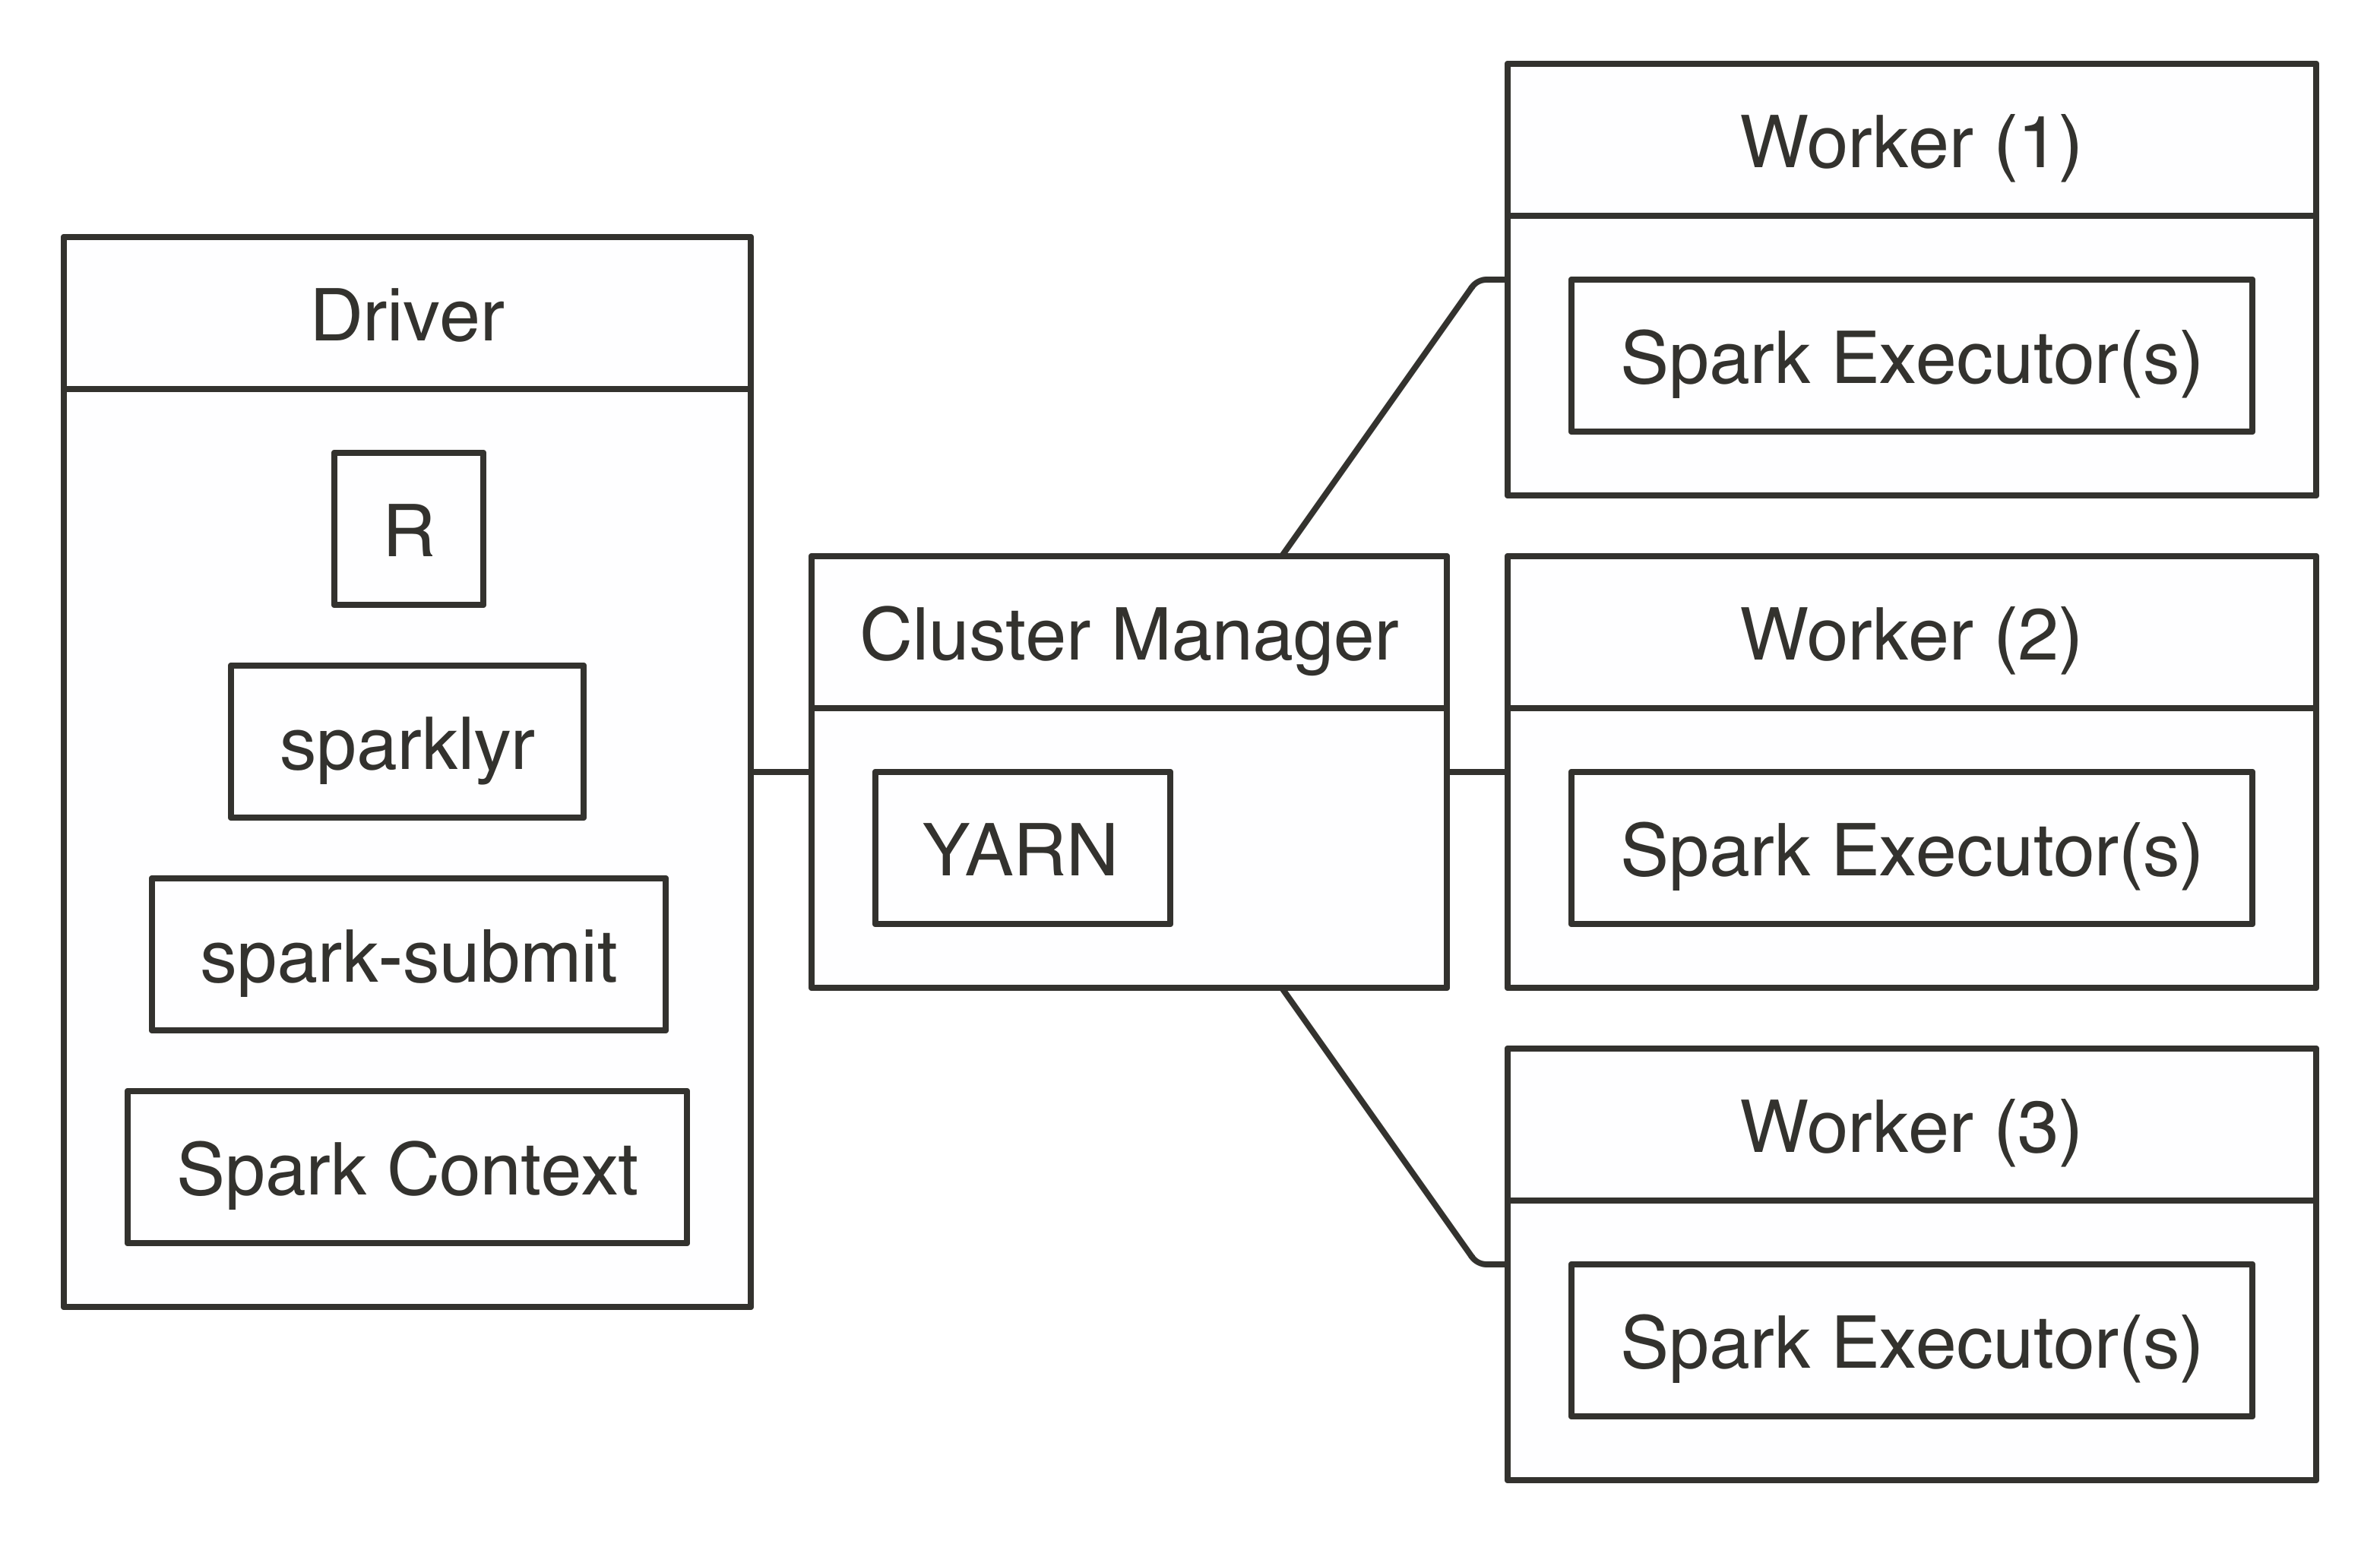

spark context : entrypoint
    

* then comes ingestion ,cleaning and analysing
* sprak provides : 
    * RDD : BAG OF OBJECTS ---> OPERATION DONE ON RECORDS ITSELF
    * DF  : STRICTER FORM --> THINK OF IT AS TABLE 
    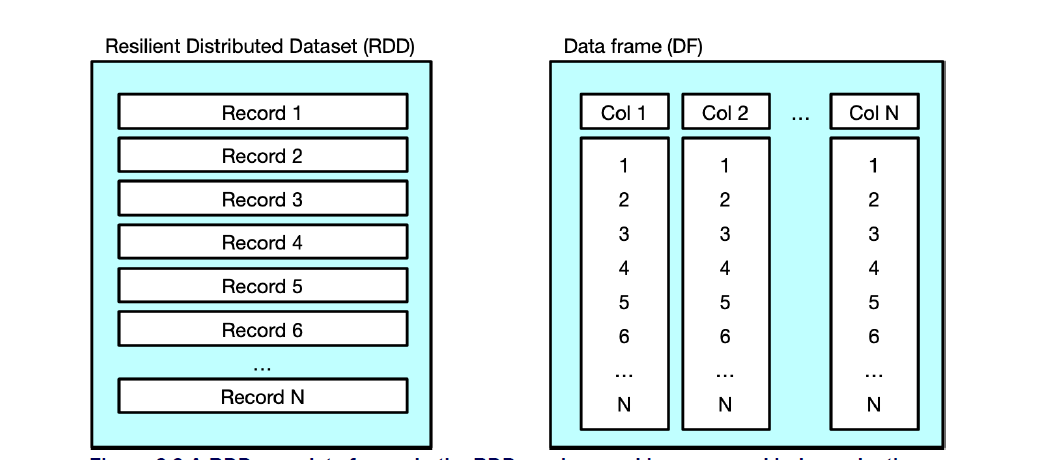

#SELECT()

In [20]:
book.select(book.value).show()

+--------------------+
|               value|
+--------------------+
|The Project Guten...|
|                    |
|This eBook is for...|
|most other parts ...|
|whatsoever. You m...|
|of the Project Gu...|
|www.gutenberg.org...|
|will have to chec...|
|   using this eBook.|
|                    |
|Title: Pride and ...|
|                    |
| Author: Jane Austen|
|                    |
|Release Date: Nov...|
|[Most recently up...|
|                    |
|   Language: English|
|                    |
|Produced by: Chuc...|
+--------------------+
only showing top 20 rows



In [21]:
from pyspark.sql.functions import col,split

In [22]:
lines = book.select(split(col("value")," "))

In [23]:
lines.printSchema()

root
 |-- split(value,  , -1): array (nullable = true)
 |    |-- element: string (containsNull = true)



In [24]:
lines.withColumnRenamed("split(value,  , -1)","newline").show()

+--------------------+
|             newline|
+--------------------+
|[The, Project, Gu...|
|                  []|
|[This, eBook, is,...|
|[most, other, par...|
|[whatsoever., You...|
|[of, the, Project...|
|[www.gutenberg.or...|
|[will, have, to, ...|
|[using, this, eBo...|
|                  []|
|[Title:, Pride, a...|
|                  []|
|[Author:, Jane, A...|
|                  []|
|[Release, Date:, ...|
|[[Most, recently,...|
|                  []|
|[Language:, English]|
|                  []|
|[Produced, by:, C...|
+--------------------+
only showing top 20 rows



In [25]:
lines.printSchema()

root
 |-- split(value,  , -1): array (nullable = true)
 |    |-- element: string (containsNull = true)



In [26]:
book.select(split(col("value")," ").alias("lines")).printSchema()

root
 |-- lines: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [27]:
lines = book.select(split(col("value")," ").alias("lines"))

In [28]:
lines = book.select(split(book.value," "))

In [29]:
lines.show()

+--------------------+
| split(value,  , -1)|
+--------------------+
|[The, Project, Gu...|
|                  []|
|[This, eBook, is,...|
|[most, other, par...|
|[whatsoever., You...|
|[of, the, Project...|
|[www.gutenberg.or...|
|[will, have, to, ...|
|[using, this, eBo...|
|                  []|
|[Title:, Pride, a...|
|                  []|
|[Author:, Jane, A...|
|                  []|
|[Release, Date:, ...|
|[[Most, recently,...|
|                  []|
|[Language:, English]|
|                  []|
|[Produced, by:, C...|
+--------------------+
only showing top 20 rows



* when you’re using a method where you’re specifying which columns you want to appear
(like select in our case here, but the next chapters will have many other examples), use
alias.
* if you just want to rename a column without changing the rest of the data frame, use
.withColumnRenamed.

In [30]:
lines.show()

+--------------------+
| split(value,  , -1)|
+--------------------+
|[The, Project, Gu...|
|                  []|
|[This, eBook, is,...|
|[most, other, par...|
|[whatsoever., You...|
|[of, the, Project...|
|[www.gutenberg.or...|
|[will, have, to, ...|
|[using, this, eBo...|
|                  []|
|[Title:, Pride, a...|
|                  []|
|[Author:, Jane, A...|
|                  []|
|[Release, Date:, ...|
|[[Most, recently,...|
|                  []|
|[Language:, English]|
|                  []|
|[Produced, by:, C...|
+--------------------+
only showing top 20 rows



In [31]:
from pyspark.sql.functions import explode

In [32]:
lines = lines.select(col("split(value,  , -1)")).alias("line")

In [33]:
lines = lines.withColumnRenamed("split(value,  , -1)", "line")

In [34]:
lines.columns

['line']

In [35]:
words = lines.select(explode(lines.line)).alias("word")

In [36]:
words.columns

['col']

In [37]:
from pyspark.sql.functions import lower

In [38]:
words_clean = words.select(lower(words.col).alias("words_lower"))

In [39]:
words_clean= words_clean.withColumnRenamed('words_lower','word')

In [40]:
words_clean.show()


+----------+
|      word|
+----------+
|       the|
|   project|
| gutenberg|
|     ebook|
|        of|
|     pride|
|       and|
|prejudice,|
|        by|
|      jane|
|    austen|
|          |
|      this|
|     ebook|
|        is|
|       for|
|       the|
|       use|
|        of|
|    anyone|
+----------+
only showing top 20 rows



In [41]:
from pyspark.sql.functions import regexp_extract

In [42]:
words_cleaned = words_clean.select(regexp_extract(col("word"),"[a-z]*",0).alias('word'))

In [43]:
words_cleaned.show()

+---------+
|     word|
+---------+
|      the|
|  project|
|gutenberg|
|    ebook|
|       of|
|    pride|
|      and|
|prejudice|
|       by|
|     jane|
|   austen|
|         |
|     this|
|    ebook|
|       is|
|      for|
|      the|
|      use|
|       of|
|   anyone|
+---------+
only showing top 20 rows



In [44]:
words_nonnull = words_cleaned.where(col('word') != "")

In [45]:
words_nonnull.show()

+---------+
|     word|
+---------+
|      the|
|  project|
|gutenberg|
|    ebook|
|       of|
|    pride|
|      and|
|prejudice|
|       by|
|     jane|
|   austen|
|     this|
|    ebook|
|       is|
|      for|
|      the|
|      use|
|       of|
|   anyone|
| anywhere|
+---------+
only showing top 20 rows



In [46]:
results = words_nonnull.groupBy("word").count().orderBy("word",ascending = False)

In [47]:
results.show()

+----------+-----+
|      word|count|
+----------+-----+
|    youths|    1|
|     youth|   10|
|yourselves|    2|
|  yourself|   49|
|     yours|   15|
|      your|  426|
|  youngest|   16|
|   younger|   28|
|    younge|    4|
|     young|  133|
|       you| 1317|
|      york|    1|
|  yielding|    4|
|   yielded|    2|
|     yield|    4|
|       yet|   76|
| yesterday|   13|
|       yes|   25|
|     years|   42|
|      year|   30|
+----------+-----+
only showing top 20 rows



In [49]:
results = results.write.csv('./results.csv')

# putting it all together

In [4]:
from pyspark.sql.functions import col,explode,regexp_extract,split,lower

In [5]:
book = spark.read.text('pride.txt')
lines = book.select(split(book.value," ").alias("line"))
words = lines.select(explode(col("line")).alias("word"))
words_lower = words.select(lower(col("word")).alias("word"))
words_clean = words_lower.select(regexp_extract(col("word"),"[a-z]*",0).alias("word"))
words_nonnull = words_clean.where(col("word") != "")
results = words_nonnull.groupby(col("word")).count()
results.orderBy("count",ascending = False).show(10)
results.coalesce(1).write.csv("singlepattern.csv")

+----+-----+
|word|count|
+----+-----+
| the| 4803|
|  to| 4374|
|  of| 3949|
| and| 3685|
| her| 2254|
|   a| 2063|
|  in| 2024|
| was| 1870|
|   i| 1778|
| she| 1703|
+----+-----+
only showing top 10 rows



AnalysisException: path file:/C:/Users/indee/singlepattern.csv already exists.

In [12]:
spark-submit .\myFirstApp.py


SyntaxError: unexpected character after line continuation character (2844851386.py, line 1)

from pyspark.sql import SparkSession
import pyspark.sql.functions as F


spark = SparkSession.builder.appName(
    "Counting word occurences from a book."
).getOrCreate()

spark.sparkContext.setLogLevel("WARN")

 If you need to read multiple text files, replace `1342-0` by `*`.
results = (
    spark.read.text("./pride.txt")
    .select(F.split(F.col("value"), " ").alias("line"))
    .select(F.explode(F.col("line")).alias("word"))
    .select(F.lower(F.col("word")).alias("word"))
    .select(F.regexp_extract(F.col("word"), "[a-z']*", 0).alias("word"))
    .where(F.col("word") != "")
    .groupby(F.col("word"))
    .count()
)

results.orderBy("count", ascending=False).show(10)
results.coalesce(1).write.csv("./results_single_partition.csv")

In [5]:
import findspark
findspark.init()

In [6]:
import os
import numpy as np
import pandas as pd



In [7]:
from pyspark.sql import SparkSession

In [8]:
spark = SparkSession.builder.appName("secondapp").getOrCreate()

# creating a dataframe out of grocery list

In [9]:
grocery = [
    ['banana',2,1.7],
    ['apple',4,.5],
    ['oranges',12,2.2]
]

In [10]:
df_grocery = spark.createDataFrame(grocery,["Item","Quantity","Price"])

In [11]:
df_grocery.show()

+-------+--------+-----+
|   Item|Quantity|Price|
+-------+--------+-----+
| banana|       2|  1.7|
|  apple|       4|  0.5|
|oranges|      12|  2.2|
+-------+--------+-----+



In [12]:
df_grocery.printSchema()

root
 |-- Item: string (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Price: double (nullable = true)



In [13]:
logs = spark.read.csv(r'C:\Users\indee\OneDrive\Desktop\BroadcastLogs_2018_Q3_M8.csv',sep = "|",header = True, inferSchema = True)

In [14]:
logs.show()

+--------------+------------+----------+----------+-------------------+----------------------+----------+---------------+-----------------+----------------+---------------+------------------+--------------+--------------------+------------+----------------+----------------+------------+------------+--------------------+----------------+--------+--------------------+------------------+----------------------+-------------+---------+---------+---------+---------+
|BroadcastLogID|LogServiceID|   LogDate|SequenceNO|AudienceTargetAgeID|AudienceTargetEthnicID|CategoryID|ClosedCaptionID|CountryOfOriginID|DubDramaCreditID|EthnicProgramID|ProductionSourceID|ProgramClassID|FilmClassificationID|ExhibitionID|        Duration|         EndTime|LogEntryDate|ProductionNO|        ProgramTitle|       StartTime|Subtitle|NetworkAffiliationID|SpecialAttentionID|BroadcastOriginPointID|CompositionID|Producer1|Producer2|Language1|Language2|
+--------------+------------+----------+----------+-------------------

In [15]:
logs.printSchema()

root
 |-- BroadcastLogID: integer (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: string (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: string (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nulla

In [16]:
logs.select(*logs.columns[:3]).show(5,False)

+--------------+------------+----------+
|BroadcastLogID|LogServiceID|LogDate   |
+--------------+------------+----------+
|1196192316    |3157        |2018-08-01|
|1196192317    |3157        |2018-08-01|
|1196192318    |3157        |2018-08-01|
|1196192319    |3157        |2018-08-01|
|1196192320    |3157        |2018-08-01|
+--------------+------------+----------+
only showing top 5 rows



In [17]:
len(logs.columns)

30

In [18]:

import  pyspark.sql.functions  as F

In [48]:
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import col

In [49]:
# CHANGING THE TYPE OF COLUMN WITHCOLUMN

In [50]:
logs = logs.withColumn("LogDateNew",col("LogDate").cast(TimestampType()))

In [51]:
logs.printSchema()

root
 |-- BroadcastLogID: integer (nullable = true)
 |-- LogServiceID: integer (nullable = true)
 |-- LogDate: string (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- AudienceTargetAgeID: integer (nullable = true)
 |-- AudienceTargetEthnicID: integer (nullable = true)
 |-- CategoryID: integer (nullable = true)
 |-- ClosedCaptionID: integer (nullable = true)
 |-- CountryOfOriginID: integer (nullable = true)
 |-- DubDramaCreditID: integer (nullable = true)
 |-- EthnicProgramID: integer (nullable = true)
 |-- ProductionSourceID: integer (nullable = true)
 |-- ProgramClassID: integer (nullable = true)
 |-- FilmClassificationID: integer (nullable = true)
 |-- ExhibitionID: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: string (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nulla

In [52]:
logs.drop("LogDate")

DataFrame[BroadcastLogID: int, LogServiceID: int, SequenceNO: int, AudienceTargetAgeID: int, AudienceTargetEthnicID: int, CategoryID: int, ClosedCaptionID: int, CountryOfOriginID: int, DubDramaCreditID: int, EthnicProgramID: int, ProductionSourceID: int, ProgramClassID: int, FilmClassificationID: int, ExhibitionID: int, Duration: string, EndTime: string, LogEntryDate: string, ProductionNO: string, ProgramTitle: string, StartTime: string, Subtitle: string, NetworkAffiliationID: int, SpecialAttentionID: int, BroadcastOriginPointID: int, CompositionID: int, Producer1: string, Producer2: string, Language1: int, Language2: int, LogDateNew: timestamp]

In [53]:
logs.columns

['BroadcastLogID',
 'LogServiceID',
 'LogDate',
 'SequenceNO',
 'AudienceTargetAgeID',
 'AudienceTargetEthnicID',
 'CategoryID',
 'ClosedCaptionID',
 'CountryOfOriginID',
 'DubDramaCreditID',
 'EthnicProgramID',
 'ProductionSourceID',
 'ProgramClassID',
 'FilmClassificationID',
 'ExhibitionID',
 'Duration',
 'EndTime',
 'LogEntryDate',
 'ProductionNO',
 'ProgramTitle',
 'StartTime',
 'Subtitle',
 'NetworkAffiliationID',
 'SpecialAttentionID',
 'BroadcastOriginPointID',
 'CompositionID',
 'Producer1',
 'Producer2',
 'Language1',
 'Language2',
 'LogDateNew']

In [54]:
logs.select(logs.columns[:3]).show(5)

+--------------+------------+----------+
|BroadcastLogID|LogServiceID|   LogDate|
+--------------+------------+----------+
|    1196192316|        3157|2018-08-01|
|    1196192317|        3157|2018-08-01|
|    1196192318|        3157|2018-08-01|
|    1196192319|        3157|2018-08-01|
|    1196192320|        3157|2018-08-01|
+--------------+------------+----------+
only showing top 5 rows



In [55]:
logs.select(*logs.columns[:3]).show(5,False)

+--------------+------------+----------+
|BroadcastLogID|LogServiceID|LogDate   |
+--------------+------------+----------+
|1196192316    |3157        |2018-08-01|
|1196192317    |3157        |2018-08-01|
|1196192318    |3157        |2018-08-01|
|1196192319    |3157        |2018-08-01|
|1196192320    |3157        |2018-08-01|
+--------------+------------+----------+
only showing top 5 rows



In [56]:
# four ways to select columns

In [57]:
logs.select("BroadcastLogId","LogServiceID","LogDate").show(5,False)

+--------------+------------+----------+
|BroadcastLogId|LogServiceID|LogDate   |
+--------------+------------+----------+
|1196192316    |3157        |2018-08-01|
|1196192317    |3157        |2018-08-01|
|1196192318    |3157        |2018-08-01|
|1196192319    |3157        |2018-08-01|
|1196192320    |3157        |2018-08-01|
+--------------+------------+----------+
only showing top 5 rows



In [58]:
logs.select(*["BroadcastLogId","LogServiceID","LogDate"]).show()

+--------------+------------+----------+
|BroadcastLogId|LogServiceID|   LogDate|
+--------------+------------+----------+
|    1196192316|        3157|2018-08-01|
|    1196192317|        3157|2018-08-01|
|    1196192318|        3157|2018-08-01|
|    1196192319|        3157|2018-08-01|
|    1196192320|        3157|2018-08-01|
|    1196192321|        3157|2018-08-01|
|    1196192322|        3157|2018-08-01|
|    1196192323|        3157|2018-08-01|
|    1196192324|        3157|2018-08-01|
|    1196192325|        3157|2018-08-01|
|    1196192326|        3157|2018-08-01|
|    1196192327|        3157|2018-08-01|
|    1196192328|        3157|2018-08-01|
|    1196192329|        3157|2018-08-01|
|    1196192330|        3157|2018-08-01|
|    1196192331|        3157|2018-08-01|
|    1196192332|        3157|2018-08-01|
|    1196192333|        3157|2018-08-01|
|    1196192334|        3157|2018-08-01|
|    1196192335|        3157|2018-08-01|
+--------------+------------+----------+
only showing top

In [59]:
logs.select(F.col("BroadcastLogID"),F.col("LogServiceID"),F.col("LogDate")).show()

+--------------+------------+----------+
|BroadcastLogID|LogServiceID|   LogDate|
+--------------+------------+----------+
|    1196192316|        3157|2018-08-01|
|    1196192317|        3157|2018-08-01|
|    1196192318|        3157|2018-08-01|
|    1196192319|        3157|2018-08-01|
|    1196192320|        3157|2018-08-01|
|    1196192321|        3157|2018-08-01|
|    1196192322|        3157|2018-08-01|
|    1196192323|        3157|2018-08-01|
|    1196192324|        3157|2018-08-01|
|    1196192325|        3157|2018-08-01|
|    1196192326|        3157|2018-08-01|
|    1196192327|        3157|2018-08-01|
|    1196192328|        3157|2018-08-01|
|    1196192329|        3157|2018-08-01|
|    1196192330|        3157|2018-08-01|
|    1196192331|        3157|2018-08-01|
|    1196192332|        3157|2018-08-01|
|    1196192333|        3157|2018-08-01|
|    1196192334|        3157|2018-08-01|
|    1196192335|        3157|2018-08-01|
+--------------+------------+----------+
only showing top

In [60]:
logs.select(*[F.col("BroadcastLogID")])

DataFrame[BroadcastLogID: int]

In [61]:
# peeking at the data frame in chuncks of three columns
import numpy  as np
splitted = np.array_split(logs.columns,len(logs.columns)//3)

In [62]:
print(splitted)

[array(['BroadcastLogID', 'LogServiceID', 'LogDate', 'SequenceNO'],
      dtype='<U22'), array(['AudienceTargetAgeID', 'AudienceTargetEthnicID', 'CategoryID'],
      dtype='<U22'), array(['ClosedCaptionID', 'CountryOfOriginID', 'DubDramaCreditID'],
      dtype='<U22'), array(['EthnicProgramID', 'ProductionSourceID', 'ProgramClassID'],
      dtype='<U22'), array(['FilmClassificationID', 'ExhibitionID', 'Duration'], dtype='<U22'), array(['EndTime', 'LogEntryDate', 'ProductionNO'], dtype='<U22'), array(['ProgramTitle', 'StartTime', 'Subtitle'], dtype='<U22'), array(['NetworkAffiliationID', 'SpecialAttentionID',
       'BroadcastOriginPointID'], dtype='<U22'), array(['CompositionID', 'Producer1', 'Producer2'], dtype='<U22'), array(['Language1', 'Language2', 'LogDateNew'], dtype='<U22')]


In [63]:

for x in splitted:
    logs.select(*x).show(5,False)
    

+--------------+------------+----------+----------+
|BroadcastLogID|LogServiceID|LogDate   |SequenceNO|
+--------------+------------+----------+----------+
|1196192316    |3157        |2018-08-01|1         |
|1196192317    |3157        |2018-08-01|2         |
|1196192318    |3157        |2018-08-01|3         |
|1196192319    |3157        |2018-08-01|4         |
|1196192320    |3157        |2018-08-01|5         |
+--------------+------------+----------+----------+
only showing top 5 rows

+-------------------+----------------------+----------+
|AudienceTargetAgeID|AudienceTargetEthnicID|CategoryID|
+-------------------+----------------------+----------+
|4                  |null                  |13        |
|null               |null                  |null      |
|null               |null                  |null      |
|null               |null                  |null      |
|null               |null                  |null      |
+-------------------+----------------------+----------+
onl

In [64]:
# DROPPING COLUMNS
        

In [65]:
logs.drop("BroadcastLogID","SequenceNO")

DataFrame[LogServiceID: int, LogDate: string, AudienceTargetAgeID: int, AudienceTargetEthnicID: int, CategoryID: int, ClosedCaptionID: int, CountryOfOriginID: int, DubDramaCreditID: int, EthnicProgramID: int, ProductionSourceID: int, ProgramClassID: int, FilmClassificationID: int, ExhibitionID: int, Duration: string, EndTime: string, LogEntryDate: string, ProductionNO: string, ProgramTitle: string, StartTime: string, Subtitle: string, NetworkAffiliationID: int, SpecialAttentionID: int, BroadcastOriginPointID: int, CompositionID: int, Producer1: string, Producer2: string, Language1: int, Language2: int, LogDateNew: timestamp]

In [66]:
len(logs.columns)

31

In [67]:
log = logs.drop("BroadcastLogID","SequenceID")

In [68]:
len(log.columns)

30

In [69]:
log1 = logs.select(*[x for x in logs.columns if x not in ["BroadcastID","SequenceID"]])

In [70]:
print ("BroadcastID" in log1.columns)
print ("SequenceID" in log1.columns)

False
False


In [71]:
# create a new df = logs_clean that contains only columns that do not end with ID


In [72]:
logs_clean = logs.select(*[x for x in logs.columns if not x.endswith("ID")])

In [73]:
logs_clean.columns

['LogDate',
 'SequenceNO',
 'Duration',
 'EndTime',
 'LogEntryDate',
 'ProductionNO',
 'ProgramTitle',
 'StartTime',
 'Subtitle',
 'Producer1',
 'Producer2',
 'Language1',
 'Language2',
 'LogDateNew']

In [74]:
logs.columns

['BroadcastLogID',
 'LogServiceID',
 'LogDate',
 'SequenceNO',
 'AudienceTargetAgeID',
 'AudienceTargetEthnicID',
 'CategoryID',
 'ClosedCaptionID',
 'CountryOfOriginID',
 'DubDramaCreditID',
 'EthnicProgramID',
 'ProductionSourceID',
 'ProgramClassID',
 'FilmClassificationID',
 'ExhibitionID',
 'Duration',
 'EndTime',
 'LogEntryDate',
 'ProductionNO',
 'ProgramTitle',
 'StartTime',
 'Subtitle',
 'NetworkAffiliationID',
 'SpecialAttentionID',
 'BroadcastOriginPointID',
 'CompositionID',
 'Producer1',
 'Producer2',
 'Language1',
 'Language2',
 'LogDateNew']

# creating what's not there withColumn()

In [77]:
logs.select(["Duration"]).show(5)

+----------------+
|        Duration|
+----------------+
|02:00:00.0000000|
|00:00:30.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
+----------------+
only showing top 5 rows



In [79]:
logs.select(F.col("Duration")).show(5)

+----------------+
|        Duration|
+----------------+
|02:00:00.0000000|
|00:00:30.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
|00:00:15.0000000|
+----------------+
only showing top 5 rows



In [82]:
print(logs.select(F.col("Duration")).dtypes)

[('Duration', 'string')]


In [ ]:
# Extracting hours ,minutes and seconds from duration column

In [88]:
logs.select(F.col("Duration"),F.col("Duration").substr(1,2).cast("int").alias("dur_hours"),
            F.col("Duration").substr(4,2).cast("int").alias("dur_mints"),
            F.col("Duration").substr(7,2).cast("int").alias("dur_seconds")).distinct().show(5)

+----------------+---------+---------+-----------+
|        Duration|dur_hours|dur_mints|dur_seconds|
+----------------+---------+---------+-----------+
|00:10:06.0000000|        0|       10|          6|
|00:10:37.0000000|        0|       10|         37|
|00:04:52.0000000|        0|        4|         52|
|00:26:41.0000000|        0|       26|         41|
|00:08:18.0000000|        0|        8|         18|
+----------------+---------+---------+-----------+
only showing top 5 rows



In [89]:
logs.select(F.col("Duration"),(F.col("Duration").substr(1,2).cast("int")*60*60 + 
                               F.col("Duration").substr(4,2).cast("int")*60 +
                              F.col("Duration").substr(7,2).cast("int")).alias("Seconds")).distinct().show(5)

+----------------+-------+
|        Duration|Seconds|
+----------------+-------+
|00:10:30.0000000|    630|
|00:25:52.0000000|   1552|
|00:28:08.0000000|   1688|
|06:00:00.0000000|  21600|
|00:32:08.0000000|   1928|
+----------------+-------+
only showing top 5 rows



In [93]:
logs_clean.withColumn("dur_seconds" , F.col("Duration").substr(1,2).cast("int")*60*60 + 
                               F.col("Duration").substr(4,2).cast("int")*60 +
                              F.col("Duration").substr(7,2).cast("int")).printSchema()

root
 |-- LogDate: string (nullable = true)
 |-- SequenceNO: integer (nullable = true)
 |-- Duration: string (nullable = true)
 |-- EndTime: string (nullable = true)
 |-- LogEntryDate: string (nullable = true)
 |-- ProductionNO: string (nullable = true)
 |-- ProgramTitle: string (nullable = true)
 |-- StartTime: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- Producer1: string (nullable = true)
 |-- Producer2: string (nullable = true)
 |-- Language1: integer (nullable = true)
 |-- Language2: integer (nullable = true)
 |-- LogDateNew: timestamp (nullable = true)
 |-- dur_seconds: integer (nullable = true)

